### 2.2 Memory Event Consumer (5%)

Write a python program that consumes the memory events using kafka consumer, visualise
the record counts in real time. Save the file as
Assignment-2B-Task2_memory_consumer.ipynb.

Your program should get the count of records arriving in the last 2 minutes (use processing
time) for each machine, and use line charts to visualise.
- Hint - x-axis can be used to represent the timeline, while y-axis can be used to
represent the count; each machine’s line data can be represented in different color
legends

<IPython.core.display.Javascript object>


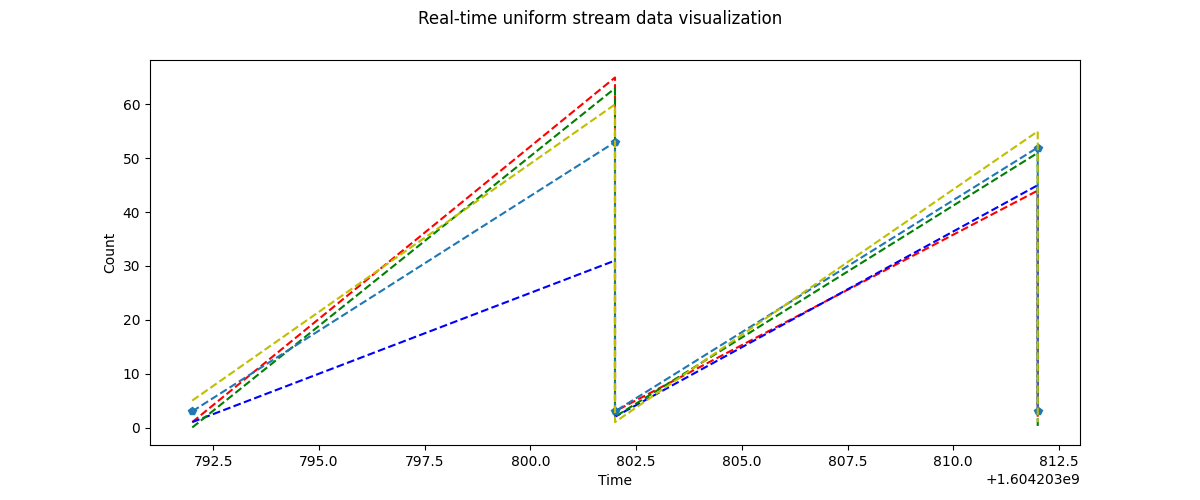

ConsumerRecord(topic='A2Bmemory', partition=0, offset=0, timestamp=1604202886104, timestamp_type=0, key=None, value=b'[47, 73, 66, 60, 60, 1604202885]', headers=[], checksum=1682480726, serialized_key_size=-1, serialized_value_size=32, serialized_header_size=-1)
ConsumerRecord(topic='A2Bmemory', partition=0, offset=1, timestamp=1604202896241, timestamp_type=0, key=None, value=b'[3, 0, 1, 3, 4, 1604202885]', headers=[], checksum=1009698232, serialized_key_size=-1, serialized_value_size=27, serialized_header_size=-1)
ConsumerRecord(topic='A2Bmemory', partition=0, offset=2, timestamp=1604202896260, timestamp_type=0, key=None, value=b'[57, 65, 27, 58, 78, 1604202896]', headers=[], checksum=333358395, serialized_key_size=-1, serialized_value_size=32, serialized_header_size=-1)
ConsumerRecord(topic='A2Bmemory', partition=0, offset=3, timestamp=1604202906300, timestamp_type=0, key=None, value=b'[0, 3, 5, 5, 4, 1604202896]', headers=[], checksum=2682803595, serialized_key_size=-1, serialized_v

KeyboardInterrupt: 

In [6]:
# import statements
from time import sleep
from kafka import KafkaConsumer
import datetime as dt
import matplotlib
import matplotlib.pyplot as plt
import time

# this line is needed for the inline display of graphs in Jupyter Notebook
%matplotlib notebook

# topic of this consumer 
topic = 'A2Bmemory'

def connect_kafka_consumer():
    _consumer = None
    try:
         _consumer = KafkaConsumer(topic,
                                   consumer_timeout_ms=100000, # stop iteration if no message after 100 sec
                                   auto_offset_reset='earliest', # comment this if you don't want to consume earliest available message
                                   bootstrap_servers=['localhost:9092'],
                                   api_version=(0, 10))
    except Exception as ex:
        print('Exception while connecting Kafka')
        print(str(ex))
    finally:
        return _consumer

def init_plots():
    try:
        width = 12
        height = 5
        fig = plt.figure(figsize=(width,height)) # create new figure
        ax = fig.add_subplot(111) # adding the subplot axes to the given grid position
        fig.suptitle('Real-time uniform stream data visualization') # giving figure a title
        ax.set_xlabel('Time')
        ax.set_ylabel('Value')
        ax.set_ylim(0,110) 
        fig.show() # displaying the figure
        fig.canvas.draw() # drawing on the canvas
        return fig, ax
    except Exception as ex:
        print(str(ex))
    
    
# Consuming mesasge function to get data from the publisher 
def consume_messages(consumer, fig, ax):
    try:
        # container for x and y values for plotting
        x, y4 ,y5, y6, y7,y8= [], [], [], [], [], []
        
        # initialiisng the 2 minute counter to store data
        end_t = time.time() + 60*2
        
        # let f be initial index of x...
        # which is 0 as we have no data in x 
        f =  0 
        
        # iterating through the array 
        for message in consumer:
            print(message)
            # evaluating the mesage value  
            data = eval(str(message.value.decode('utf-8')))

            # appending data into the list of x and y for plotting later
            # i.e. collecting data for 2 minutes 
            x.append(int(data[5])) # time stamp             
            y4.append(int(data[0])) # machine 4
            y5.append(int(data[1])) # machine 5
            y6.append(int(data[2])) # machine 6
            y7.append(int(data[3])) # machine 7 
            y8.append(int(data[4])) # mavhine 8
            


            # we start plotting only when we have have collected data for 2 minutes 
            # checking if currect time has crossed 2 min timer 
            # if yes let's print 
            if time.time()>end_t:
                
                # now printing 5 datapoints at a time 
                for r in range(f,len(x),5):
                    
                    #print(f,len(x))
                    # collecting data from x 
                    x1 = x[r:r+5]
                    # collecting data form y's for each machine
                    y41 = y4[r:r+5]
                    y51 = y5[r:r+5]
                    y61 = y6[r:r+5]
                    y71 = y7[r:r+5]
                    y81 = y8[r:r+5]

                    # clearing the previous plotted graphs
                    ax.clear()
                    # different color for each machine
                    ax.plot(x1, y41,'r--',x1,y51,'b--',x1,y61,'g--',x1,y71,'p--',x1,y81,'y--')
                    # label
                    ax.set_xlabel('Time')
                    ax.set_ylabel('Count')
                    
                    # frawing the canvas 
                    fig.canvas.draw()
                    
                    # emptying the lists for next iteration
                    x1.pop(0) # removing the item in the first position
                    y41.pop(0)
                    y51.pop(0)
                    y61.pop(0)
                    y71.pop(0)
                    y81.pop(0)
                    # sleep for 2 seconds to clearly see the plots after 5 datapoints
                    sleep(2)
                    
                # updating f the list 
                f = len(x)
                end_t = time.time() + 60*2

        plt.close('all')
    except Exception as ex:
        print(str(ex))
        
    
if __name__ == '__main__':
    
    consumer = connect_kafka_consumer()
    #print(consumer)
    fig, ax = init_plots()
    consume_messages(consumer, fig, ax)
    
    
    